<a href="https://colab.research.google.com/github/ubermenchh/learnpytorch/blob/main/CustomDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
!git clone https://github.com/ubermenchh/learnpytorch.git
%cd learnpytorch

Cloning into 'learnpytorch'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 39 (delta 15), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (39/39), 1.32 MiB | 14.66 MiB/s, done.
Resolving deltas: 100% (15/15), done.
/content/learnpytorch/learnpytorch


In [77]:
import torch
from torch import nn

In [78]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [79]:
import torchvision
from torchvision import datasets

In [80]:
from pathlib import Path
import zipfile
import requests

In [81]:
data_path = Path('data/')
image_path = data_path / 'pizza_steak_sushi'

if image_path.is_dir():
    print(f'{image_path} directory already exists------')
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [82]:
import os

def walk_through_dir(file_path):
    for dirpath, dirnames, filenames in os.walk(file_path):
        print(f'There are {len(dirnames)} directories and {len(filenames)} files in {dirpath}')

In [83]:
walk_through_dir(image_path)

There are 2 directories and 0 files in data/pizza_steak_sushi
There are 3 directories and 0 files in data/pizza_steak_sushi/train
There are 0 directories and 78 files in data/pizza_steak_sushi/train/pizza
There are 0 directories and 75 files in data/pizza_steak_sushi/train/steak
There are 0 directories and 72 files in data/pizza_steak_sushi/train/sushi
There are 3 directories and 0 files in data/pizza_steak_sushi/test
There are 0 directories and 25 files in data/pizza_steak_sushi/test/pizza
There are 0 directories and 19 files in data/pizza_steak_sushi/test/steak
There are 0 directories and 31 files in data/pizza_steak_sushi/test/sushi


In [84]:
train_dir = image_path / 'train'
test_dir = image_path / 'test'

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [85]:
import random
from PIL import Image

image_path_list = list(image_path.glob('*/*/*.jpg'))
random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
img = Image.open(random_image_path)

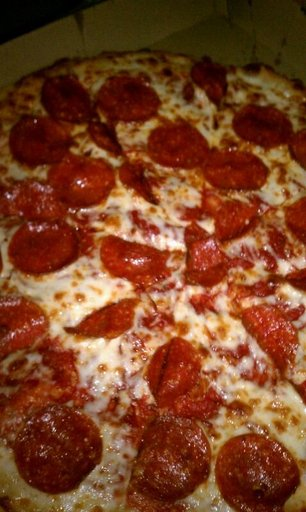

In [86]:
img

In [87]:
random_image_path, image_class, img.height, img.width

(PosixPath('data/pizza_steak_sushi/test/pizza/930553.jpg'), 'pizza', 512, 306)

In [88]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

In [89]:
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [90]:
def plot_transformed_image(image_paths, transform, n=3):
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f'Original: {f.size}')
            ax[0].axis('off')

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f'Transformed: {transformed_image.shape}')
            ax[1].axis('off')

            fig.suptitle(f'Class: {image_path.parent.stem}', fontsize=16)

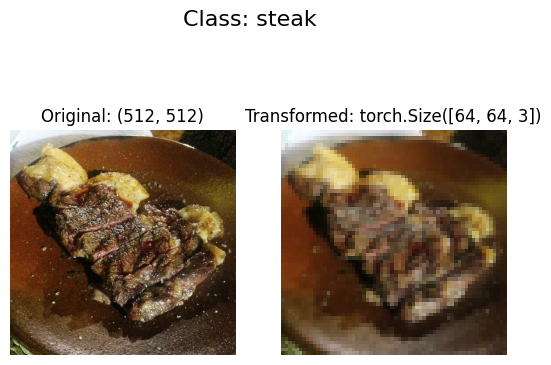

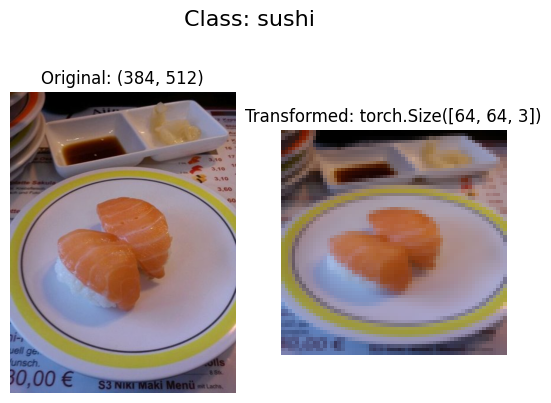

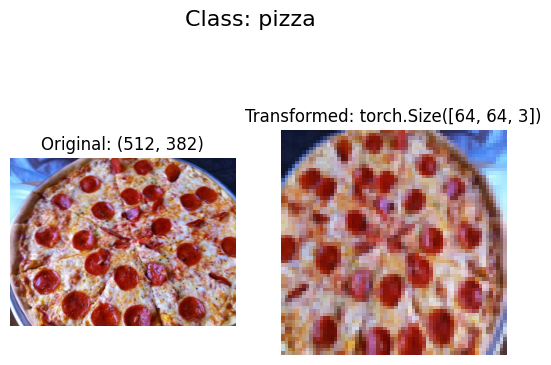

In [91]:
plot_transformed_image(image_path_list, data_transform, n=3)

In [92]:
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)
test_data = datasets.ImageFolder(root=test_dir, transform=data_transform)

In [93]:
print(f"Train Data:\n{train_data}\nTest Data:\n{test_data}")

Train Data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test Data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [94]:
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [95]:
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [96]:
len(train_data), len(test_data)

(225, 75)

In [97]:
train_dataloader = DataLoader(dataset=train_data, batch_size=1, num_workers=1, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=1, num_workers=1, shuffle=False)

In [98]:
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c607afad420>,
 <torch.utils.data.dataloader.DataLoader at 0x7c607afac310>)

In [99]:
img, label = next(iter(train_dataloader))
img.shape, label

(torch.Size([1, 3, 64, 64]), tensor([1]))

In [100]:
target_dir = train_dir
class_names_found = sorted([entry.name for entry in list(os.scandir(image_path/'train'))])
class_names_found

['pizza', 'steak', 'sushi']

In [101]:
def find_classes(dir):
    classes = sorted([entry.name for entry in list(os.scandir(dir)) if entry.is_dir()])
    if not classes:
        raise FileNotFoundError(f"Couldn't find any classes in {dir}")

    class_to_idx = {cls_name: i for i, cls_name in enumerate(classes)}
    return classes, class_to_idx

In [102]:
import pathlib
from torch.utils.data import Dataset

class ImageFolderCustom(Dataset):
    def __init__(self, targ_dir, transform=None):
        self.paths = list(pathlib.Path(targ_dir).glob('*/*.jpg'))
        self.transform = transform
        self.classes, self.class_to_idx = find_classes(targ_dir)

    def load_image(self, index):
        image_path = self.paths[index]
        return Image.open(image_path)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index):
        img = self.load_image(index)
        class_name = self.paths[index].parent.name
        class_idx = self.class_to_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [103]:
train_transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
test_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [104]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform=train_transform)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transform)

In [105]:
len(train_data_custom), len(test_data_custom)

(225, 75)

In [106]:
train_data_custom.classes, train_data_custom.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

In [107]:
def display_random_image(dataset, classes=None, n=10, display_shape=True, seed=None):
    if n > 10:
        n = 10
        display_shape = False
        print('For display purposes should not be greater than 10')

    if seed: random.seed(seed)

    random_sample_idx = random.sample(range(len(dataset)), k=n)

    plt.figure(figsize=(16, 8))

    for i, targ_sample in enumerate(random_sample_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis('off')
        if classes:
            title = f'class: {classes[targ_label]}'
            if display_shape:
                title = title + f"\nShape: {targ_image_adjust.shape}"
        plt.title(title)

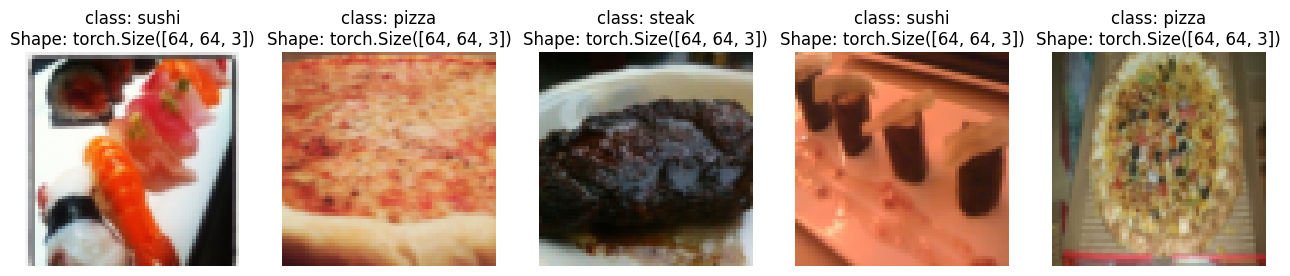

In [108]:
display_random_image(train_data, n=5, classes=class_names)

For display purposes should not be greater than 10


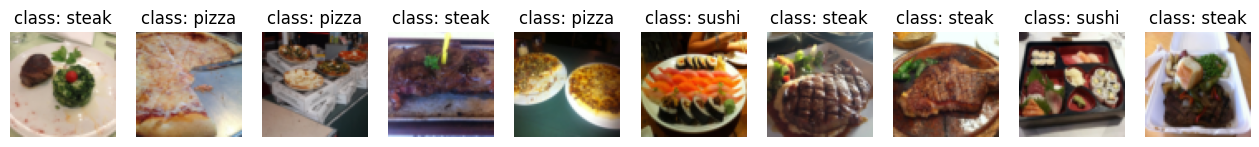

In [109]:
display_random_image(train_data_custom, n=12, classes=class_names)

In [110]:
train_dataloader_custom = DataLoader(dataset=train_data_custom, batch_size=1, num_workers=0, shuffle=True)
test_dataloader_custom = DataLoader(dataset=test_data_custom, batch_size=1, num_workers=0, shuffle=False)

In [111]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom

(torch.Size([1, 3, 64, 64]), tensor([2]))

In [112]:
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

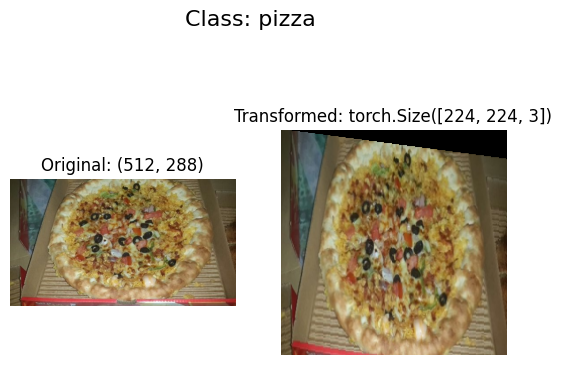

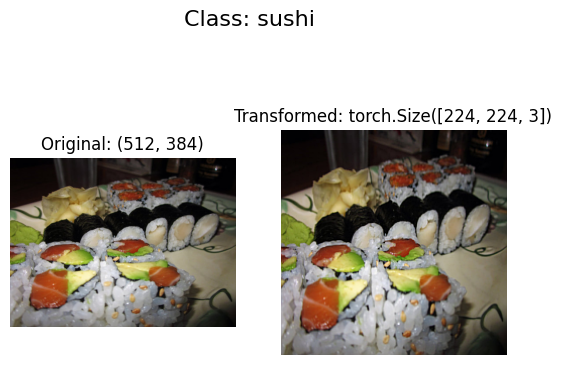

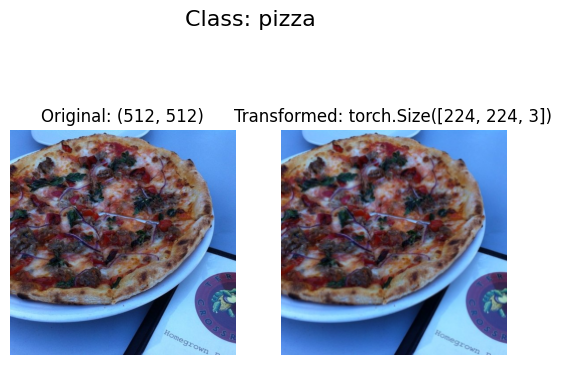

In [113]:
image_path_list = list(image_path.glob('*/*/*.jpg'))
plot_transformed_image(image_path_list, train_transforms, n=3)

In [114]:
simple_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [115]:
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=simple_transform)

BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_simple = DataLoader(train_data_simple, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader_simple = DataLoader(test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [116]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16, out_features=output_shape)
        )

    def forward(self, x):
        return self.classifier(self.conv_block2(self.conv_block1(x)))

In [117]:
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data.classes)).to(device)
model_0

TinyVGG(
  (conv_block1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [118]:
img_batch, label_batch = next(iter(train_dataloader))
img_single, label_single = img_batch[0].unsqueeze(dim=0), label_batch[0]
img_single.shape

torch.Size([1, 3, 64, 64])

In [119]:
model_0.eval()
with torch.inference_mode():
    pred = model_0(img_single.to(device))

In [120]:
pred, torch.softmax(pred, dim=1), torch.argmax(torch.softmax(pred, dim=1), dim=1), label_single

(tensor([[ 0.0201,  0.0203, -0.0125]]),
 tensor([[0.3369, 0.3370, 0.3261]]),
 tensor([1]),
 tensor(0))

In [121]:
!pip install -q torchinfo

In [122]:
import torchinfo
from torchinfo import summary

In [123]:
summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

In [124]:
def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [125]:
def test_step(model, dataloader, loss_fn):
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = torch.argmax(torch.softmax(test_pred_logits, dim=1), dim=1)
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_labels)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc

In [126]:
from tqdm.auto import tqdm

def train(model, train_dataloader, test_dataloader, optimizer, loss_fn, epochs=5):
    results = {'train_loss': [],
               'train_acc' : [],
               'test_loss' : [],
               'test_acc'  : []}

    for epoch in range(epochs):
        train_loss, train_acc = train_step(model, train_dataloader, loss_fn, optimizer)
        test_loss,  test_acc  = test_step (model, test_dataloader , loss_fn)

        print(
            f"Epoch: {epoch}",
            f'Train Loss: {train_loss:.4f} | ',
            f'Train Accuracy: {train_acc:.4f} | ',
            f'Test Loss: {test_loss:.4f} | ',
            f'Test Accuracy: {test_acc:.4f}'
        )

        results['train_loss'].append(train_loss)
        results['train_acc'].append(train_acc)
        results['test_loss'].append(test_loss)
        results['test_acc'].append(test_acc)

    return results

In [127]:
NUM_EPOCHS = 5

model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.003)

model_0_results = train(model_0, train_dataloader_simple, test_dataloader_simple, optimizer, loss_fn, epochs=NUM_EPOCHS)

Epoch: 0 Train Loss: 1.0973 |  Train Accuracy: 0.4141 |  Test Loss: 1.1046 |  Test Accuracy: 0.1979
Epoch: 1 Train Loss: 1.1000 |  Train Accuracy: 0.2930 |  Test Loss: 1.1064 |  Test Accuracy: 0.1979
Epoch: 2 Train Loss: 1.0976 |  Train Accuracy: 0.2930 |  Test Loss: 1.1082 |  Test Accuracy: 0.2604
Epoch: 3 Train Loss: 1.0975 |  Train Accuracy: 0.3047 |  Test Loss: 1.1115 |  Test Accuracy: 0.1979
Epoch: 4 Train Loss: 1.0964 |  Train Accuracy: 0.2617 |  Test Loss: 1.1131 |  Test Accuracy: 0.2604


In [128]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [129]:
def plot_loss_curves(results):
    loss, test_loss, accuracy, test_accuracy = results['train_loss'], results['test_loss'], results['train_acc'], results['train_loss']
    epochs = range(len(results['train_loss']))
    plt.figure(figsize=(15, 7))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend();

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

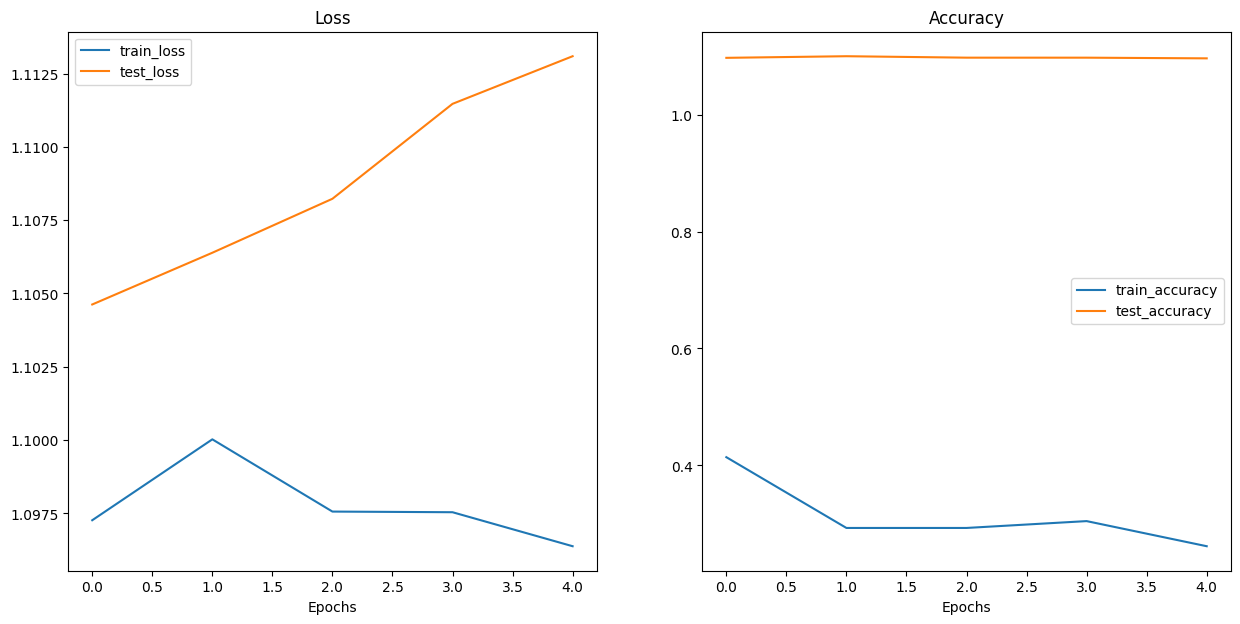

In [130]:
plot_loss_curves(model_0_results)

In [132]:
train_transform_trivial_augment = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor()
])

In [134]:
train_data_augment = datasets.ImageFolder(train_dir, transform=train_transform_trivial_augment)
test_data_simple = datasets.ImageFolder(test_dir, transform=test_transforms)

train_data_augment, test_data_simple

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                TrivialAugmentWide(num_magnitude_bins=31, interpolation=InterpolationMode.NEAREST, fill=None)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                ToTensor()
            ))

In [135]:
import os
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_dataloader_augment = DataLoader(train_data_augment, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS)
test_dataloader_augment = DataLoader(test_data_simple, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS)

In [139]:
NUM_EPOCHS = 5

model_1 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(train_data_augment.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr=0.003)

model_1_results = train(model_1, train_dataloader_augment, test_dataloader_augment, optimizer, loss_fn, epochs=NUM_EPOCHS)

Epoch: 0 Train Loss: 1.1119 |  Train Accuracy: 0.3594 |  Test Loss: 1.1969 |  Test Accuracy: 0.1979
Epoch: 1 Train Loss: 1.1376 |  Train Accuracy: 0.2930 |  Test Loss: 1.1218 |  Test Accuracy: 0.2604
Epoch: 2 Train Loss: 1.1244 |  Train Accuracy: 0.3047 |  Test Loss: 1.1097 |  Test Accuracy: 0.2604
Epoch: 3 Train Loss: 1.0949 |  Train Accuracy: 0.4258 |  Test Loss: 1.1280 |  Test Accuracy: 0.2604
Epoch: 4 Train Loss: 1.0776 |  Train Accuracy: 0.4258 |  Test Loss: 1.1283 |  Test Accuracy: 0.2604


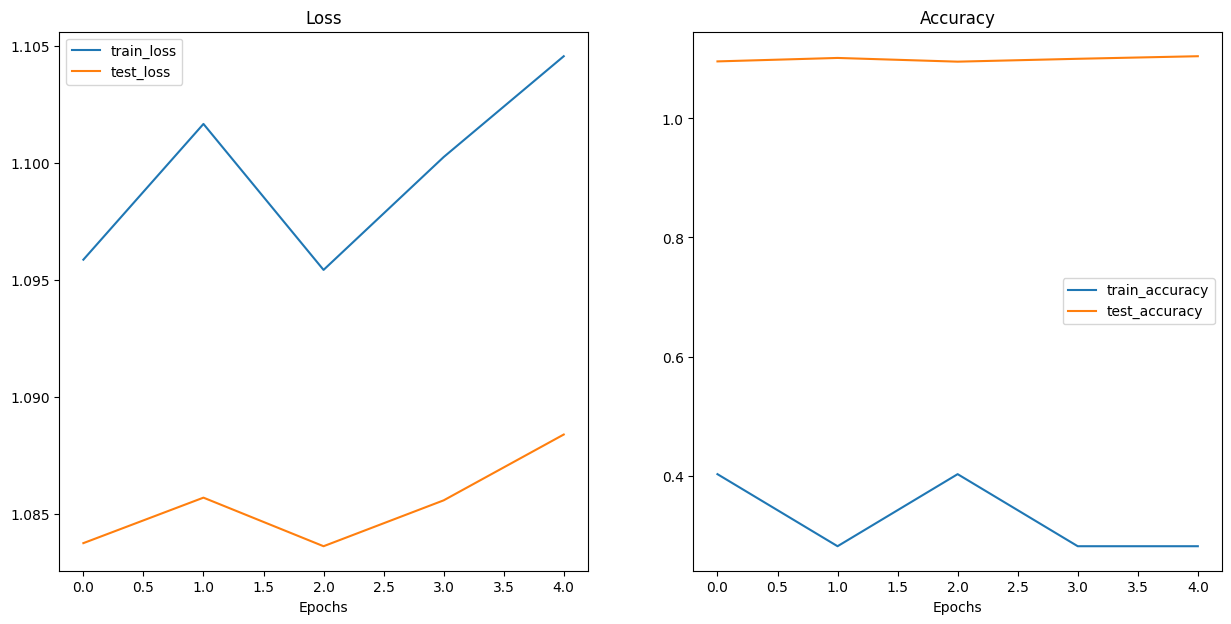

In [138]:
plot_loss_curves(model_1_results)